# Plotting
Used this Notebook to generate Plots based on training and validation metrics for my bachelor thesis.

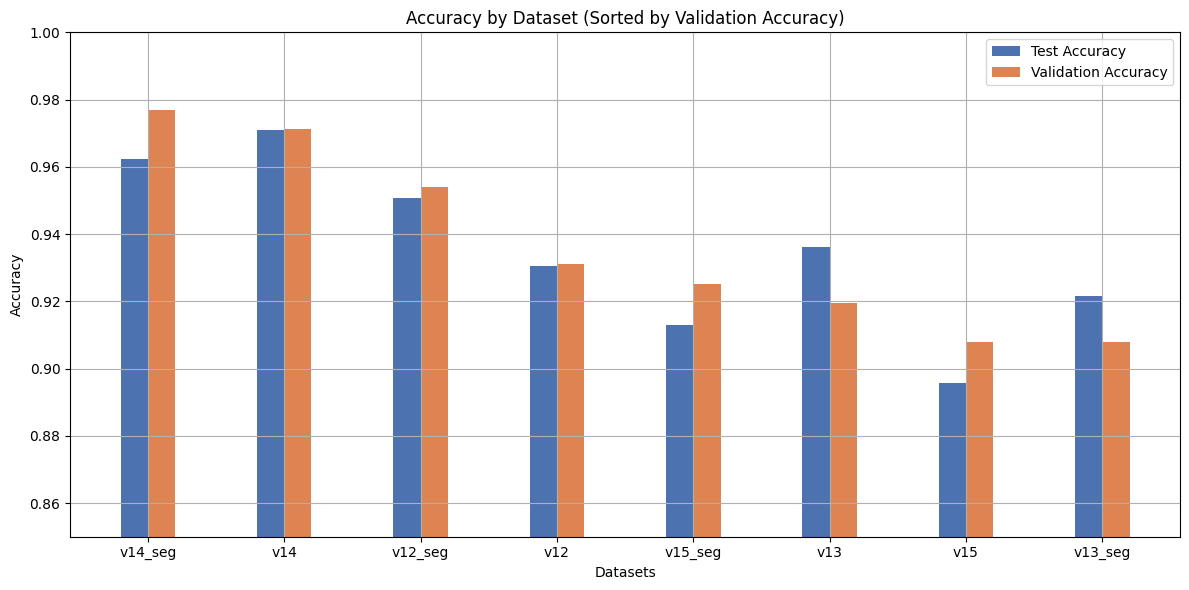

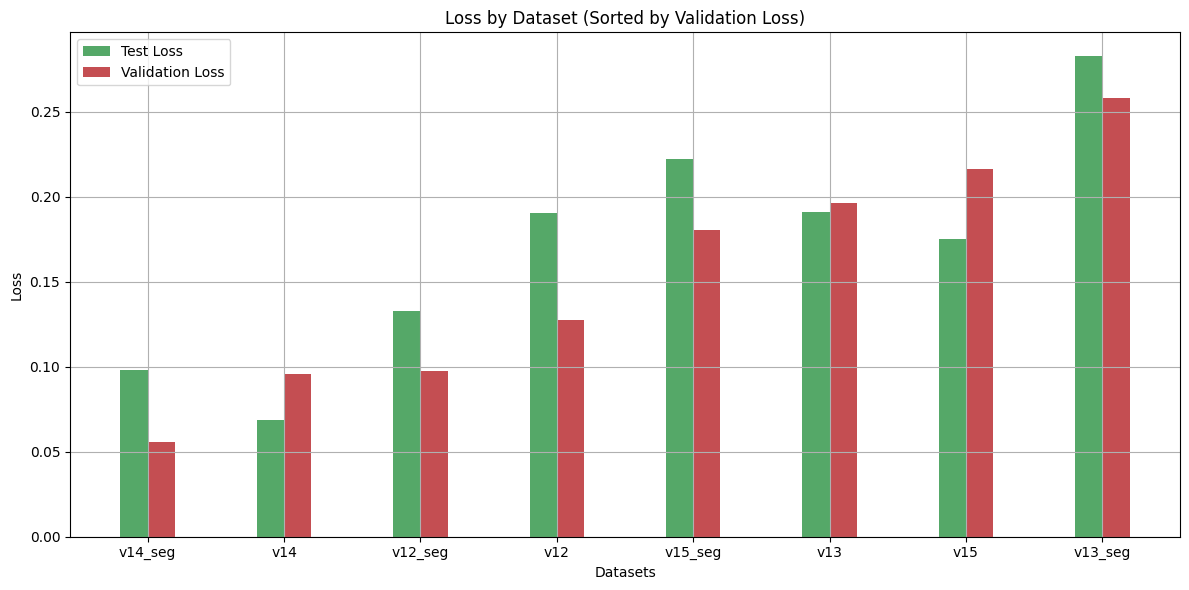

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Daten aus der Evaluation
datasets = ["v12", "v12_seg", "v13", "v13_seg", "v14", "v14_seg", "v15", "v15_seg"]
test_accuracy = [0.9304, 0.9507, 0.9217, 0.8957, 0.9710, 0.9623, 0.9362, 0.9130]
test_recall = [0.9304, 0.9507, 0.9217, 0.8957, 0.9710, 0.9623, 0.9362, 0.9130]
test_precision = [0.9300, 0.9520, 0.9293, 0.8961, 0.9711, 0.9624, 0.9363, 0.9127]
val_accuracy = [0.9310, 0.9540, 0.9080, 0.9080, 0.9713, 0.9770, 0.9195, 0.9253]
val_recall = [0.9310, 0.9540, 0.9080, 0.9080, 0.9713, 0.9770, 0.9195, 0.9253]
val_precision = [0.9305, 0.9538, 0.9091, 0.9091, 0.9735, 0.9770, 0.9352, 0.9317]
test_loss = [0.1903, 0.1326, 0.1908, 0.2825, 0.0687, 0.0983, 0.1752, 0.2222]
val_loss = [0.1272, 0.0973, 0.1964, 0.2579, 0.0956, 0.0556, 0.2161, 0.1801]

# Farben für die Balken
colors = {
    'soft_blue': '#4c72b0',
    'soft_orange': '#dd8452',
    'soft_green': '#55a868',
    'soft_red': '#c44e52',
    'soft_purple': '#8172b3',
    'soft_brown': '#937860',
    'soft_pink': '#da8bc3',
    'soft_gray': '#8c8c8c',
    'soft_yellow': '#ccb974',
    'soft_cyan': '#64b5cd'
}

# Sortieren nach Validation Accuracy
sorted_indices = np.argsort(val_accuracy)[::-1]  # Absteigend sortieren
sorted_datasets = [datasets[i] for i in sorted_indices]
sorted_test_accuracy = [test_accuracy[i] for i in sorted_indices]
sorted_val_accuracy = [val_accuracy[i] for i in sorted_indices]
sorted_test_recall = [test_recall[i] for i in sorted_indices]
sorted_val_recall = [val_recall[i] for i in sorted_indices]
sorted_test_precision = [test_precision[i] for i in sorted_indices]
sorted_val_precision = [val_precision[i] for i in sorted_indices]

# Sortieren nach Validation Loss
sorted_indices = np.argsort(val_loss)  # Aufsteigend sortieren
sorted_datasets = [datasets[i] for i in sorted_indices]
sorted_test_loss = [test_loss[i] for i in sorted_indices]
sorted_val_loss = [val_loss[i] for i in sorted_indices]

# prepare plot
x = np.arange(len(datasets))/2  # Label-Standorte
width = 0.1  # Breite der Balken

# Plot für Accuracy
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, sorted_test_accuracy, width, label='Test Accuracy', color=colors['soft_blue'])
rects2 = ax.bar(x + width/2, sorted_val_accuracy, width, label='Validation Accuracy', color=colors['soft_orange'])

# Labels und Titel für Accuracy
ax.set_xlabel('Datasets')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Dataset (Sorted by Validation Accuracy)')
ax.set_xticks(x)
ax.set_xticklabels(sorted_datasets)
ax.set_ylim(0.85, 1)
ax.legend()
ax.grid(True)
fig.tight_layout()
plt.show()
#plt.savefig('models_accuracy_sorted.pdf')

# Plot für Loss
fig, ax = plt.subplots(figsize=(12, 6))
rects3 = ax.bar(x - width/2, sorted_test_loss, width, label='Test Loss', color=colors['soft_green'])
rects4 = ax.bar(x + width/2, sorted_val_loss, width, label='Validation Loss', color=colors['soft_red'])

# Labels und Titel für Loss
ax.set_xlabel('Datasets')
ax.set_ylabel('Loss')
ax.set_title('Loss by Dataset (Sorted by Validation Loss)')
ax.set_xticks(x)
ax.set_xticklabels(sorted_datasets)
ax.legend()
ax.grid(True)

fig.tight_layout()
plt.show()
#plt.savefig('models_loss_sorted.pdf')


# Metrics
Use this to show Accuracy of selected Model.
If needed, recreate Metricplots inside Model Folder.

In [2]:
# this script is used to display the accuracy plot of a selected dataset
import ipywidgets as widgets
from IPython.display import display, HTML, Image
import os


global dataset_path

# dropdown on change function
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output:
            output.clear_output()
            print(f"Selected dataset: {change['new']}")

        # display the selected dataset
        output_accuracy_plot(change['new'])

def output_accuracy_plot(dataset):
    global dataset_path
    output.clear_output()
    dataset_path = f"./trainingOutput/{dataset}"
    # display accuracy plot
    accuracy_plot = f"{dataset_path}/images-plots/plots/Accuracy_plot.png"
    # check if file exists, use output widget to display image
    if os.path.isfile(accuracy_plot):
        with output:
            display(Image(filename=accuracy_plot))
    else:
        with output:
            print(f"Accuracy plot not found: {accuracy_plot}")

def on_recreate_metrics_button_clicked(b):
    global dataset_path
    print("Recreating metrics")
    import src.trainCNN.tensorboardHandler as tbh
    tb = tbh.TensorBoard(os.path.join(dataset_path, 'tensorboard'))
    tb.plot_tensorboard_data()
    output_accuracy_plot(dropdown.value)

# get all folder in training folder and use them as options
def get_datasets_from_folder(folder):
    return [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))][::-1]

# ---- Widgets ----
# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=get_datasets_from_folder('./trainingOutput'),
    description='Training:',
    disabled=False,
)
dropdown.observe(on_change)

# Create a button widget to run code
button = widgets.Button(description="Run", button_style='success')

btn_recreateMetrics = widgets.Button(description="Recreate Metrics", button_style='success')
btn_recreateMetrics.on_click(on_recreate_metrics_button_clicked)

# Create an output widget
output = widgets.Output()
output.layout = {
    'border': '1px solid black',
    'overflow_y': 'auto',  # Add a vertical scrollbar in case of overflow
}
output_accuracy_plot(dropdown.value)


# display widgets
display(dropdown, btn_recreateMetrics, output)

Dropdown(description='Training:', options=('bin', '2024-06-07_23-59-29_urinal_Dataset_v15_seg_inception_v3_FT_…

Button(button_style='success', description='Recreate Metrics', style=ButtonStyle())

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…